<a href="https://colab.research.google.com/github/dsliwka/EEMP2024/blob/main/Notebooks/LPPanalyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

!pip install pyfixest -q

import pyfixest as pf
import seaborn as sns

In [2]:
path_to_data = "https://raw.githubusercontent.com/dsliwka/EEMP2024/main/Data/LPP-CF_1215_v1.csv"
df = pd.read_csv(path_to_data)


<Axes: xlabel='msat_job', ylabel='Count'>

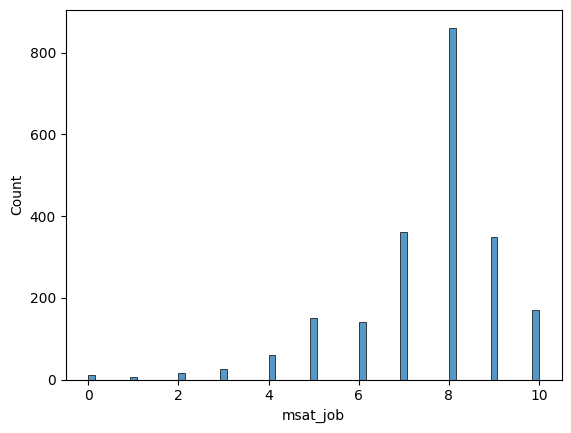

In [3]:
sns.histplot(df.msat_job)

In [4]:
df.groupby(df.mmagespr).msat_job.describe()

,count,mean,std,min,25%,50%,75%,max
mmagespr,,,,,,,,
0.0,1171.0,7.366354,1.783072,0.0,7.0,8.0,8.0,10.0
1.0,981.0,7.737003,1.513931,0.0,7.0,8.0,9.0,10.0


<Axes: xlabel='mmagespr', ylabel='msat_job'>

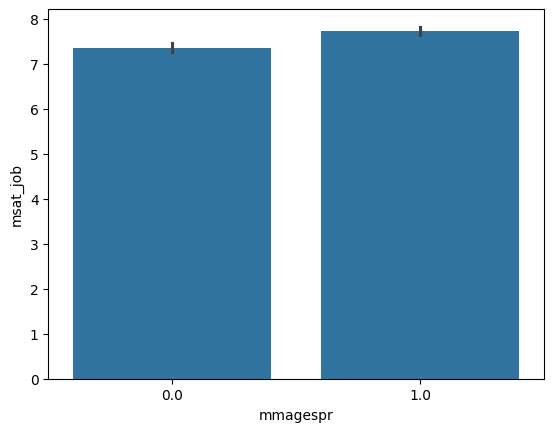

In [5]:
sns.barplot(x="mmagespr", y= "msat_job", data=df)

In [6]:
reg = pf.feols("msat_job~ mmagespr", data=df)
labels={"mmagespr": "Feedback Interview", "msat_job": "Job Satisfaction"}
pf.etable(reg, labels=labels)


GT(_tbl_data=  level_0             level_1                      0
0    coef  Feedback Interview  0.371*** <br> (0.072)
1    coef           Intercept  7.366*** <br> (0.049)
2   stats        Observations                   2152
3   stats           S.E. type                    iid
4   stats       R<sup>2</sup>                  0.012, _body=<great_tables._gt_data.Body object at 0x795056c03100>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x795056c00f10>, _spanners=Spanners([SpannerInfo(spanner_id='Job Satisfaction', spanner_level=1, spanner_label='Job Satisfaction', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x795056c02a10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_co

In [7]:
pf.summary(reg)

###

Estimation:  OLS
Dep. var.: msat_job, Fixed effects: 0
Inference:  iid
Observations:  2152

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Intercept     |      7.366 |        0.049 |   151.325 |      0.000 |  7.271 |   7.462 |
| mmagespr      |      0.371 |        0.072 |     5.141 |      0.000 |  0.229 |   0.512 |
---
RMSE: 1.665 R2: 0.012 


In [8]:
reg1 = pf.feols("msat_job ~ mmagespr", data=df)
reg2 = pf.feols("msat_job ~ mmagespr + alter + mleitung + mbef + maz_voll_teil + mheim + mwb", data=df)
pf.etable([reg1, reg2], labels=labels)


GT(_tbl_data=   level_0             level_1                      0                      1
0     coef  Feedback Interview  0.371*** <br> (0.072)  0.339*** <br> (0.075)
1     coef               alter                          0.012** <br> (0.004)
2     coef            mleitung                            0.003 <br> (0.081)
3     coef                mbef                           -0.128 <br> (0.194)
4     coef       maz_voll_teil                           -0.102 <br> (0.106)
5     coef               mheim                           -0.068 <br> (0.100)
6     coef                 mwb                          0.231** <br> (0.077)
7     coef           Intercept  7.366*** <br> (0.049)  6.731*** <br> (0.201)
8    stats        Observations                   2152                   2145
9    stats           S.E. type                    iid                    iid
10   stats       R<sup>2</sup>                  0.012                  0.021, _body=<great_tables._gt_data.Body object at 0x795056ae9060>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x795056c03610>, _spanners=Spanners([SpannerInfo(spanner_id='Job Satisfaction', spanner_level=1, spanner_label='Job Satisfaction', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x795056c031c0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, categor

In [9]:
df["alter2"]= df.alter*df.alter
reg1=pf.feols("msat_job ~ alter + alter2 " , data=df)
pf.etable(reg1, digits=5)


GT(_tbl_data=  level_0        level_1                          0
0    coef          alter    -0.05444 <br> (0.03485)
1    coef         alter2     0.00073 <br> (0.00039)
2    coef      Intercept  8.39664*** <br> (0.76219)
3   stats   Observations                       2154
4   stats      S.E. type                        iid
5   stats  R<sup>2</sup>                    0.00519, _body=<great_tables._gt_data.Body object at 0x795056f47ca0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x795056f479a0>, _spanners=Spanners([SpannerInfo(spanner_id='msat_job', spanner_level=1, spanner_label='msat_job', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x795056f46a70>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', valu

In [10]:
0.05444/(2*0.00073)

37.28767123287672

<Axes: xlabel='alter', ylabel='msat_job'>

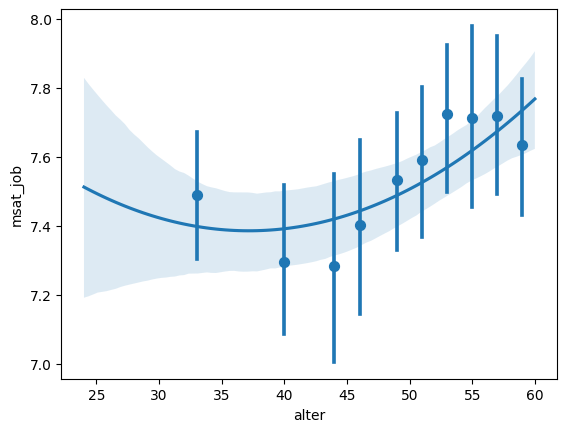

In [11]:
sns.regplot(x="alter", y="msat_job", data=df, order=2, x_bins=10)

In [12]:
# coefs = []
# obs = df.shape[0] ## This is the number of observations in df

# # Repeat here 100 times:
# for i in range(100):
#   # Draw a sample with replacement from df
#   bootstrap = df.sample(n= obs, replace=True)
#   reg=pf.feols("msat_job~ mmagespr", data=bootstrap)
#   coefs.append(reg.coef().mmagespr)

# np.std(coefs, ddof=1)

** **


 ** **

In [13]:
df.filter(regex="menga*").describe()

,menga_energie,menga_fit,menga_begeist,menga_insp,menga_freude,menga_glueck,menga_stolz,menga_aufgeh,menga_mitreiss
count,2135.000000,2147.000000,2142.000000,2132.000000,2146.000000,2146.000000,2148.000000,2150.000000,2143.000000
mean,2.525527,1.924546,2.160131,2.556754,2.415191,2.115564,1.857542,2.286977,2.448903
std,0.967213,0.843200,0.988036,1.241798,1.064157,1.017181,0.944774,1.095261,1.128974
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


 ** **
  

In [14]:
df.filter(regex="menga*").corr()

,menga_energie,menga_fit,menga_begeist,menga_insp,menga_freude,menga_glueck,menga_stolz,menga_aufgeh,menga_mitreiss
menga_energie,1.000000,0.492697,0.468644,0.460693,0.446090,0.376920,0.349689,0.446228,0.467766
menga_fit,0.492697,1.000000,0.560656,0.440387,0.518979,0.445260,0.416084,0.438021,0.464075
menga_begeist,0.468644,0.560656,1.000000,0.650834,0.632169,0.527921,0.589475,0.611744,0.629093
menga_insp,0.460693,0.440387,0.650834,1.000000,0.570258,0.492980,0.501761,0.582787,0.662736
menga_freude,0.446090,0.518979,0.632169,0.570258,1.000000,0.571486,0.499735,0.566753,0.587506
menga_glueck,0.376920,0.445260,0.527921,0.492980,0.571486,1.000000,0.510534,0.527674,0.543847
menga_stolz,0.349689,0.416084,0.589475,0.501761,0.499735,0.510534,1.000000,0.658116,0.593445
menga_aufgeh,0.446228,0.438021,0.611744,0.582787,0.566753,0.527674,0.658116,1.000000,0.761680
menga_mitreiss,0.467766,0.464075,0.629093,0.662736,0.587506,0.543847,0.593445,0.761680,1.000000


In [24]:
df.filter(regex="menga*").cov()

,menga_energie,menga_fit,menga_begeist,menga_insp,menga_freude,menga_glueck,menga_stolz,menga_aufgeh,menga_mitreiss
menga_energie,0.935501,0.401571,0.446237,0.552224,0.457538,0.368215,0.319032,0.473713,0.509525
menga_fit,0.401571,0.710986,0.466591,0.460634,0.465010,0.381686,0.331021,0.404129,0.440813
menga_begeist,0.446237,0.466591,0.976214,0.794153,0.664777,0.530251,0.546701,0.660879,0.698628
menga_insp,0.552224,0.460634,0.794153,1.542061,0.751638,0.619091,0.589011,0.792565,0.927020
menga_freude,0.457538,0.465010,0.664777,0.751638,1.132431,0.619418,0.502181,0.660514,0.703275
menga_glueck,0.368215,0.381686,0.530251,0.619091,0.619418,1.034657,0.487449,0.586974,0.621150
menga_stolz,0.319032,0.331021,0.546701,0.589011,0.502181,0.487449,0.892598,0.680383,0.630676
menga_aufgeh,0.473713,0.404129,0.660879,0.792565,0.660514,0.586974,0.680383,1.199598,0.940125
menga_mitreiss,0.509525,0.440813,0.698628,0.927020,0.703275,0.621150,0.630676,0.940125,1.274582


In [15]:
!pip install pingouin -q
import pingouin as pg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 13.6 MB/s eta 0:00:00


(0.9096587490587688, array([0.904, 0.915]))

In [23]:
pg.cronbach_alpha(data=df.filter(regex="menga*"))

(0.9096587490587688, array([0.904, 0.915]))

In [21]:
df["enga"] = 6-df.filter(regex="menga*").mean(axis=1)
df["enga_std"]= (df.enga-df.enga.mean())/df.enga.std()
df.enga_std.describe()


,enga_std
count,2.156000e+03
mean,-1.878522e-16
std,1.000000e+00
min,-3.469973e+00
25%,-5.918489e-01
50%,1.819214e-01
75%,7.437514e-01
max,1.586496e+00


In [22]:
regs=[]
for var in ['menga_energie', 'menga_fit',  'menga_begeist',  'menga_insp',  'menga_freude',  'menga_glueck', 'menga_stolz',  'menga_aufgeh',  'menga_mitreiss']:
    regs.append(pf.feols("mturnover ~ " + var, data=df))


regs.append(pf.feols("mturnover ~ enga", data=df))
pf.etable(regs)


GT(_tbl_data=   level_0         level_1                       0                       1  \
0     coef   menga_energie  -0.153*** <br> (0.020)                           
1     coef       menga_fit                          -0.237*** <br> (0.022)   
2     coef   menga_begeist                                                   
3     coef      menga_insp                                                   
4     coef    menga_freude                                                   
5     coef    menga_glueck                                                   
6     coef     menga_stolz                                                   
7     coef    menga_aufgeh                                                   
8     coef  menga_mitreiss                                                   
9     coef            enga                                                   
10    coef       Intercept   4.829*** <br> (0.053)   4.900*** <br> (0.046)   
11   stats    Observations                    2094                    2108   
12   stats       S.E. type                     iid                     iid   
13   stats   R<sup>2</sup>                   0.029                   0.052   

                         2                       3                       4  \
0                                                                            
1                                                                            
2   -0.286*** <br> (0.018)                                                   
3                           -0.177*** <br> (0.015)                           
4                                                   -0.305*** <br> (0.017)   
5                                                                            
6                                                                            
7                                                                            
8                                                                            
9                                                                            
10   5.063*** <br> (0.044)   4.899*** <br> (0.042)   5.180*** <br> (0.044)   
11                    2102                    2092                    2106   
12                     iid                     iid                     iid   
13                   0.104                   0.063                   0.137   

                         5                       6                       7  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
5   -0.189*** <br> (0.018)                                                   
6                           -0.236*** <br> (0.020)                           
7                                                   -0.227*** <br> (0.017)   
8                                                                            
9                                                                            
10   4.842*** <br> (0.043)   4.883*** <br> (0.041)   4.963*** <br> (0.042)   
11                    2106                    2107                    2109   
12                     iid                     iid                     iid   
13                   0.047                   0.064                   0.081   

                         8                      9  
0                                                  
1                                                  
2                                                  
3                                                  
4                                                  
5                                                  
6                                                  
7                                                  
8   -0